In [26]:
import requests
import pandas as pd
import json
import numpy as np
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import scipy.stats as stats


from uszipcode import SearchEngine

In [19]:
df = pd.read_csv('mod_CA2010Fires.csv')
batcha = pd.read_csv('nasapowerbatch1.csv')
batchb = pd.read_csv('nasapowerbatch2.csv')
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
print(df.head())

   Unnamed: 0  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  \
0           0       2010    Equipment Use  36.766944 -121.303056    CA   
1           1       2010    Miscellaneous  36.776944 -121.311111    CA   
2           2       2010    Miscellaneous  36.856111 -121.381111    CA   
3           3       2010    Miscellaneous  36.818056 -121.391111    CA   
4           4       2010    Miscellaneous  36.883056 -121.561944    CA   

   DISCOVERY_DATE  FIRE_SIZE        DATE      zipcode  \
0       2455335.5       70.0  2010-05-19  95075-9701,   
1       2455355.5        0.5  2010-06-08       95023,   
2       2455359.5        0.1  2010-06-12       95023,   
3       2455361.5        0.1  2010-06-14       95023,   
4       2455388.5        1.0  2010-07-11  95045-9662,   

                                             address  
0  Saddle Association Museum, Airline Highway, Tr...  
1  Pinnacle Hills Golf Club, 7777, Airline Highwa...  
2  1198, Santa Ana Road, Hollister, San Benito 

In [13]:
drops = []
for i in range(len(df)):
    if df['zipcode'][i][0] < '0' or df['zipcode'][i][0] > '9':
        drops.append(i)
print(len(drops))

   Unnamed: 0  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  \
0           0       2010    Equipment Use  36.766944 -121.303056    CA   
1           1       2010    Miscellaneous  36.776944 -121.311111    CA   
2           2       2010    Miscellaneous  36.856111 -121.381111    CA   
3           3       2010    Miscellaneous  36.818056 -121.391111    CA   
4           4       2010    Miscellaneous  36.883056 -121.561944    CA   

   DISCOVERY_DATE  FIRE_SIZE        DATE      zipcode  \
0       2455335.5       70.0  2010-05-19  95075-9701,   
1       2455355.5        0.5  2010-06-08       95023,   
2       2455359.5        0.1  2010-06-12       95023,   
3       2455361.5        0.1  2010-06-14       95023,   
4       2455388.5        1.0  2010-07-11  95045-9662,   

                                             address  
0  Saddle Association Museum, Airline Highway, Tr...  
1  Pinnacle Hills Golf Club, 7777, Airline Highwa...  
2  1198, Santa Ana Road, Hollister, San Benito 

In [14]:
print(len(df))
print(len(batcha))
print(len(batchb))
batcha = batcha.drop(drops)
batchb = batchb.drop(drops)
df = df.drop(drops)
print(len(df))
print(len(batcha))
print(len(batchb))

In [15]:
df.reset_index(inplace=True, drop=True)
batcha.reset_index(inplace=True, drop=True)
batchb.reset_index(inplace=True, drop=True)

   Unnamed: 0  Unnamed: 0.1                      LLstr  \
0           0             0  36.76694444,-121.30305555   
1           1             1  36.77694444,-121.31111111   
2           2             2  36.85611111,-121.38111111   
3           3             3  36.81805555,-121.39111111   
4           4             4  36.88305555,-121.56194444   

                                             address      zipcode  
0  Saddle Association Museum, Airline Highway, Tr...  95075-9701,  
1  Pinnacle Hills Golf Club, 7777, Airline Highwa...       95023,  
2  1198, Santa Ana Road, Hollister, San Benito Co...       95023,  
3  186, Hospital Road, Hollister, San Benito Coun...       95023,  
4  Chittenden Road, River Oaks, San Benito County...  95045-9662,  
31858


In [17]:
t = [batcha, batchb]
res = pd.concat(t, axis=1)
print(res)

92508,
92314,


In [ ]:
# df.to_csv('20kFires.csv')

In [3]:
test = pd.read_csv('full_fires.csv')
print(test.head())


/Users/gaofamily/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


   Unnamed: 0  OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0           0         1       1  FS-1418826                FED   FS-FIRESTAT   
1           1         2       2  FS-1418827                FED   FS-FIRESTAT   
2           2         3       3  FS-1418835                FED   FS-FIRESTAT   
3           3         4       4  FS-1418845                FED   FS-FIRESTAT   
4           4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT  ... FIRE_SIZE_CLASS   LATITUDE   LONG

In [5]:
test['DATE'] = pd.to_datetime(test['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [6]:
print(test['DATE'][len(test)-1])

2015-03-14 00:00:00


In [41]:
fires = pd.read_csv('20kFires.csv')
climate = pd.read_csv('20kClimate.csv')
human = pd.read_csv('20kHuman.csv')
print(fires.head())
print(climate.head())
print(human.head())

   Unnamed: 0  Unnamed: 0.1  FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE  \
0           0             0       2010    Equipment Use  36.766944   
1           1             1       2010    Miscellaneous  36.776944   
2           2             2       2010    Miscellaneous  36.856111   
3           3             3       2010    Miscellaneous  36.818056   
4           4             4       2010    Miscellaneous  36.883056   

    LONGITUDE STATE  DISCOVERY_DATE  FIRE_SIZE        DATE     zipcode  \
0 -121.303056    CA       2455335.5       70.0  2010-05-19  95075-9701   
1 -121.311111    CA       2455355.5        0.5  2010-06-08       95023   
2 -121.381111    CA       2455359.5        0.1  2010-06-12       95023   
3 -121.391111    CA       2455361.5        0.1  2010-06-14       95023   
4 -121.561944    CA       2455388.5        1.0  2010-07-11  95045-9662   

                                             address  
0  Saddle Association Museum, Airline Highway, Tr...  
1  Pinnacle Hills Golf C

In [8]:
print(len(climate))
print(len(fires))

23035
23035


slope 0.41356026306157695
intercept 22.34926650525342
r_value 0.11174844401734757


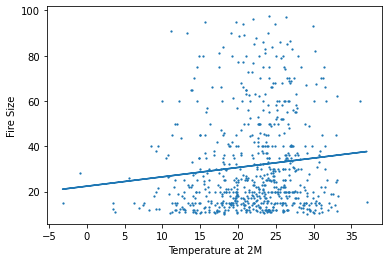

In [38]:
x = []
y = []

mx = 100
mn = 10
for i in range(len(fires)):
    if fires['FIRE_SIZE'][i] < mx and fires['FIRE_SIZE'][i] > mn:
        x.append(float(climate['T2M'][i]))
        y.append(float(fires['FIRE_SIZE'][i]))

nx = np.array(x)
ny = np.array(y)
plt.scatter(nx, ny, s=1.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(nx, ny)
plt.plot(nx, slope*nx+intercept)
print("slope " + str(slope))
print("intercept " + str(intercept))
print("r_value " + str(r_value))

plt.xlabel('Temperature at 2M')
plt.ylabel('Fire Size')
plt.show()
# print(x)
# print(y)
# print(fires.columns)

slope -0.006954625404824956
intercept 31.5686961349568
r_value -0.0026057699668234372


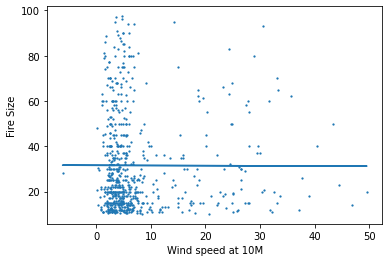

In [40]:
x = []
y = []

mx = 100
mn = 10
for i in range(len(fires)):
    if fires['FIRE_SIZE'][i] < mx and fires['FIRE_SIZE'][i] > mn and climate['WS10M'][i] < 50:
        x.append(float(climate['WS10M'][i]))
        y.append(float(fires['FIRE_SIZE'][i]))

nx = np.array(x)
ny = np.array(y)
plt.scatter(nx, ny, s=1.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(nx, ny)
plt.plot(nx, slope*nx+intercept)
print("slope " + str(slope))
print("intercept " + str(intercept))
print("r_value " + str(r_value))

plt.xlabel('Wind speed at 10M')
plt.ylabel('Fire Size')
plt.show()
# print(x)
# print(y)
# print(fires.columns)

slope -4.945877803962505e-05
intercept 32.69816032776716
r_value -0.049574621151043


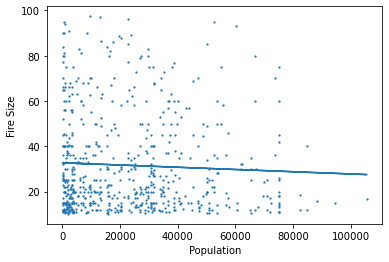

In [48]:
x = []
y = []

mx = 100
mn = 10
for i in range(len(fires)):
    if fires['FIRE_SIZE'][i] < mx and fires['FIRE_SIZE'][i] > mn:
        if human['Population'][i] is None or np.isnan(human['Population'][i]):
            continue
        x.append(float(human['Population'][i]))
        y.append(float(fires['FIRE_SIZE'][i]))

nx = np.array(x)
ny = np.array(y)
plt.scatter(nx, ny, s=1.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(nx, ny)
plt.plot(nx, slope*nx+intercept)
print("slope " + str(slope))
print("intercept " + str(intercept))
print("r_value " + str(r_value))

plt.xlabel('Population')
plt.ylabel('Fire Size')
plt.show()
# print(x)
# print(y)
# print(fires.columns)